# Paper 2: Ensemble Model with kNN, SVM, and Random Forest

https://ieeexplore.ieee.org/abstract/document/9793221/references#references

In [1]:
# Import libraries and read data
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

df = pd.read_csv('mushrooms.csv')

In [2]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
# Data cleaning

# Drop 'veil-type' column since it only has one possible feature.
df = df.drop('veil-type', axis=1)

In [5]:
# Transform string-encoded features to numerical features.
df = df.apply(lambda x: x.astype('category'))
df = df.apply(lambda x: x.cat.codes)

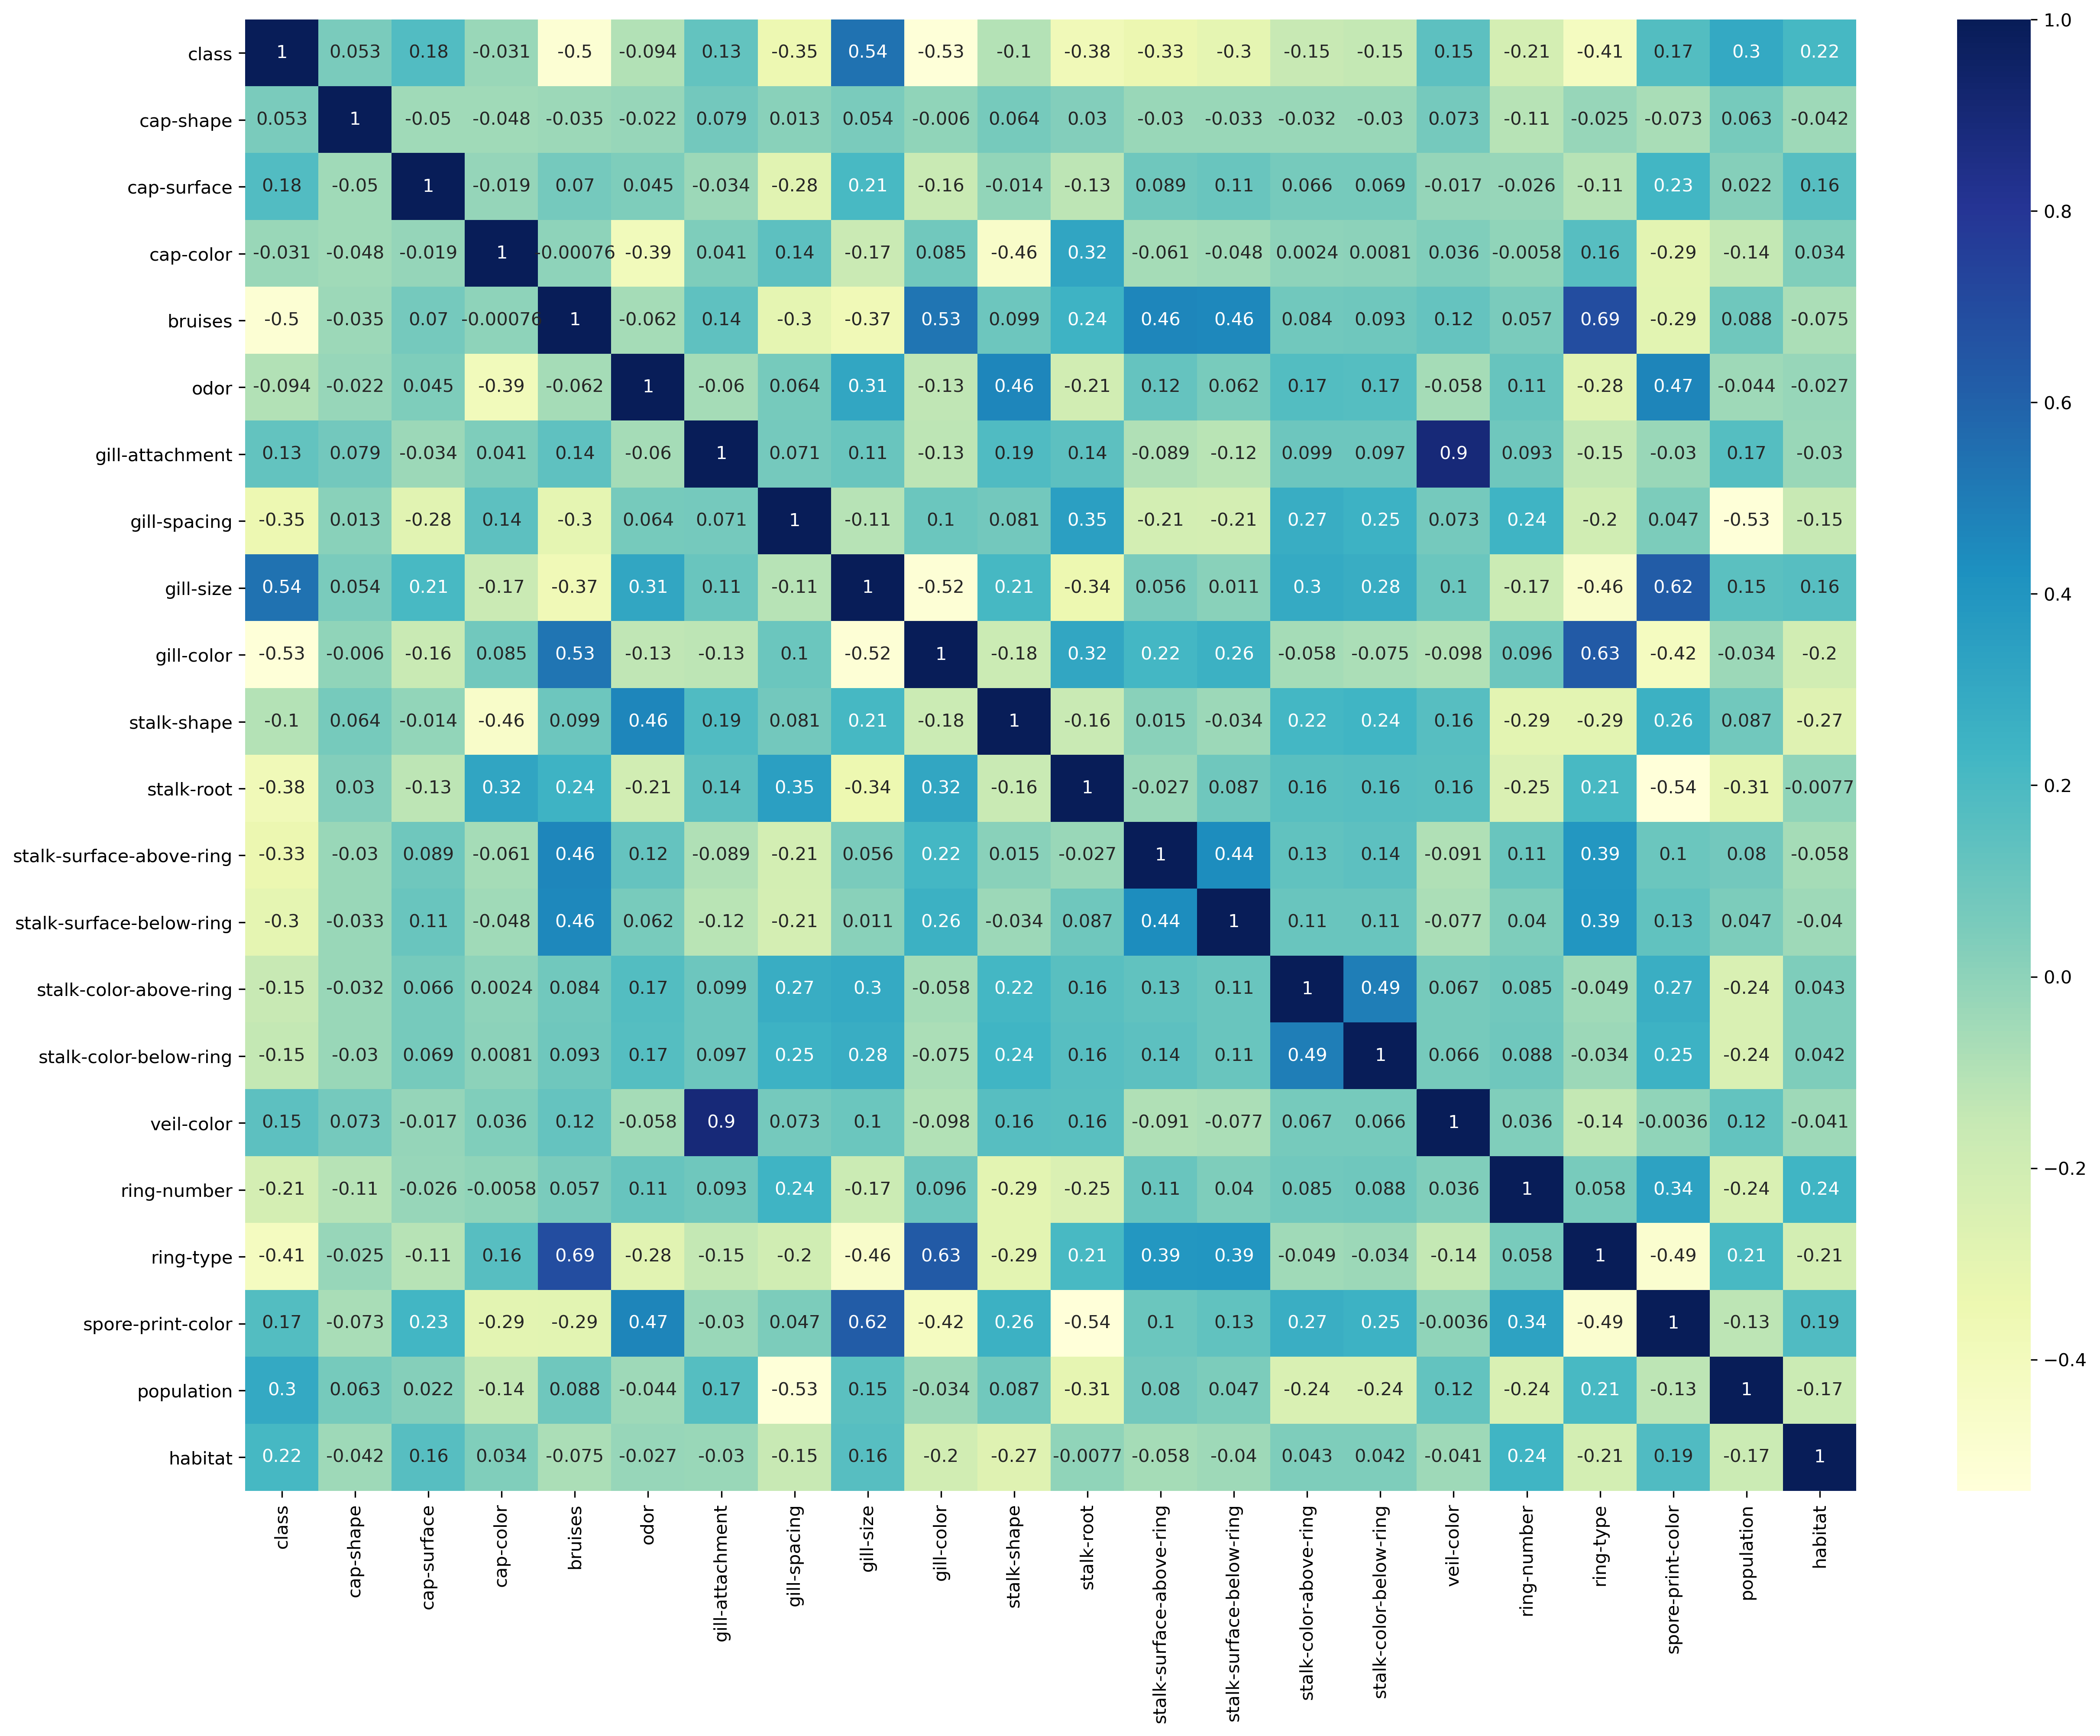

In [6]:
# Plot correlation matrix to determine highly correlated features. We will remove features with less than 0.5 correlation values.
plt.figure(figsize=(20, 15)) 
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", vmax=1) 
plt.show()

In [7]:
# Based on correlation matrix, we will keep the following columns: 
# cap-shape, cap-surface, gill-attachment, gill-size, veil-color, spore-print-color, population and habitat.

# We also need to keep class since it's our label
features_to_keep = ['class', 'cap-shape', 'cap-surface', 'gill-attachment', 'gill-size', 'veil-color', 'spore-print-color', 'population', 'habitat']

df = df.drop(columns=[col for col in df if col not in features_to_keep])


In [8]:
# Split data into features and labels
x = df.loc[:, df.columns != 'class']
y = df['class']

In [9]:
# Split the dataset into training and testing subsets. According the paper, only 20% was set aside for testing.
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
# Define models

# kNN - parameters: k (number of neighbours)
knn = KNeighborsClassifier(n_neighbors=3)

# SVM - parameters: C (regularization)
svm = SVC(C=1, random_state=0)

# Random Forest - parameters: n_estimators (number of decision trees)
rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [11]:
# Combine and train models
com = []

com.append(('knn', knn))

com.append(('SVM', svm))

com.append(('Forest', rf))

ensemble = VotingClassifier(com, voting='hard')

ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('SVM', SVC(C=1, random_state=0)),
                             ('Forest',
                              RandomForestClassifier(random_state=0))])

In [12]:
# Score the model
print("Test Accuracy: {}%".format(round(ensemble.score (x_test, y_test) * 100,4)))

Test Accuracy: 99.3231%


## Modifying the Model

The first modification we propose is individually adjusting the parameters of each model to see individual performance.

In [16]:
# Explore the k-NN model
knn_scores = {}
# Key: k, Value: score

for k in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    knn_scores[k] = score

knn_scores_df = pd.DataFrame.from_dict(knn_scores, orient="index", columns=["score"])

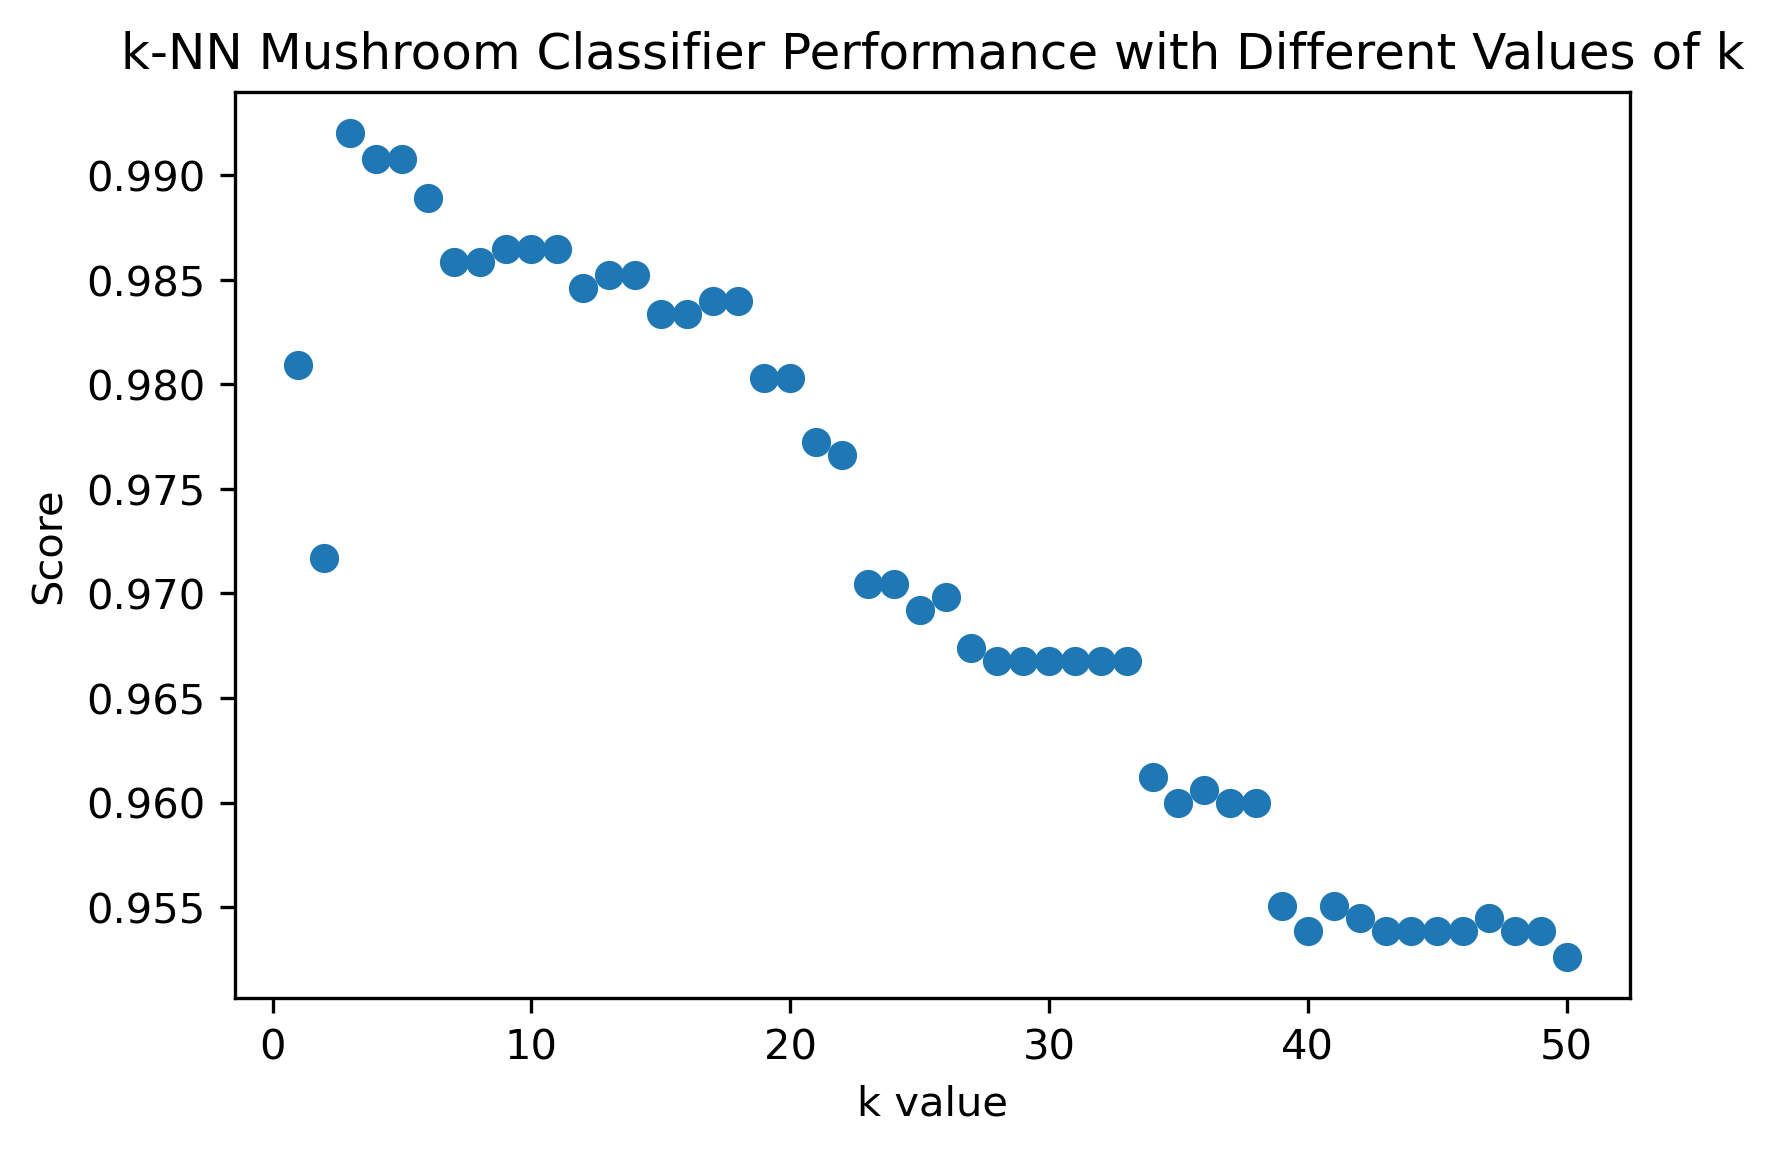

In [17]:
# visualize the k-NN model performance with respect to changing k values
fig, ax = plt.subplots()
scatter = ax.scatter(range(1, 51), knn_scores_df['score'])

ax.set_title('k-NN Mushroom Classifier Performance with Different Values of k')
ax.set_ylabel('Score')
ax.set_xlabel('k value')

plt.show()

In [33]:
# Explore the SVM model
svm_scores = {}
# Key: c, Value: score

for c in range(1, 51):
    model = SVC(C=c, random_state=0)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    svm_scores[c] = score

svm_scores_df = pd.DataFrame.from_dict(svm_scores, orient="index", columns=["score"])

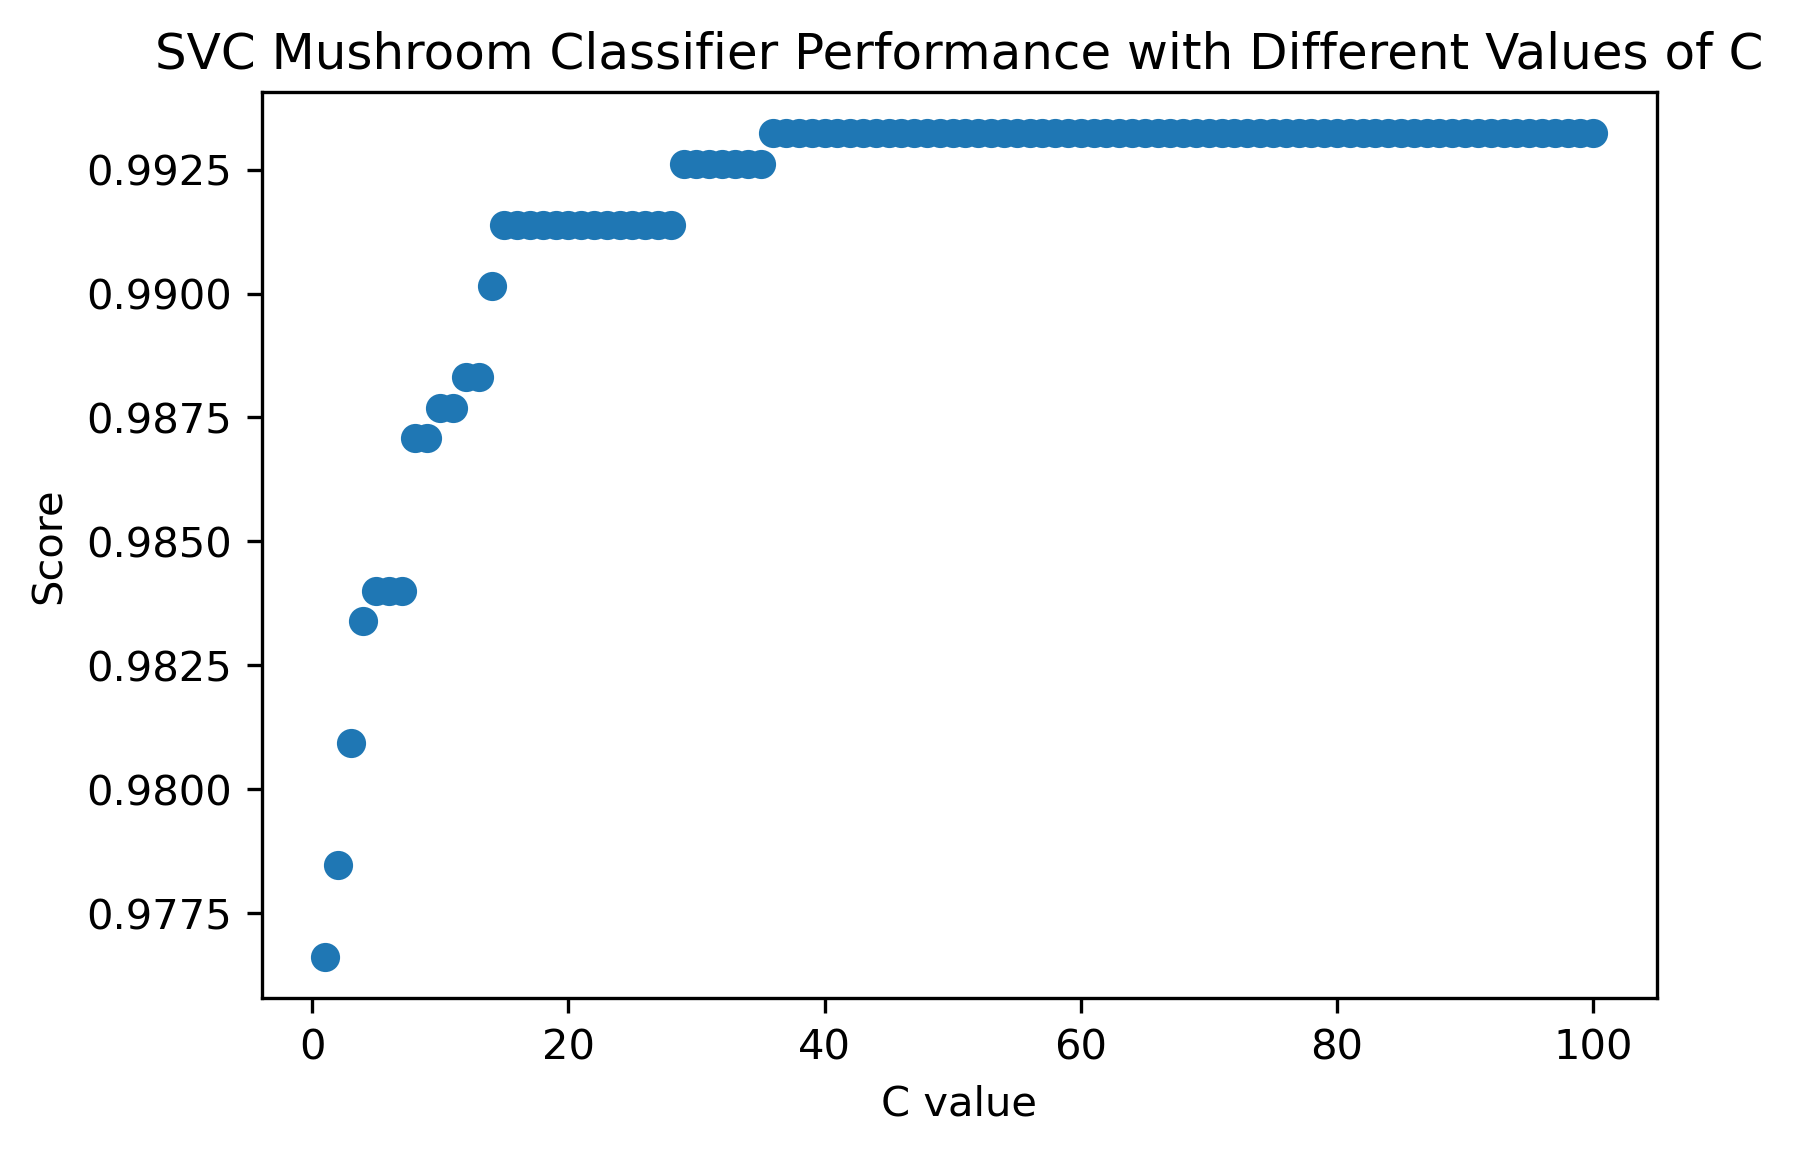

In [34]:
# Visualize the k-NN model performance with respect to changing k values
fig, ax = plt.subplots()
scatter = ax.scatter(range(1, 51), svm_scores_df['score'])

ax.set_title('SVC Mushroom Classifier Performance with Different Values of C')
ax.set_ylabel('Score')
ax.set_xlabel('C value')

plt.show()

In [40]:
# Explore the Random Forest model
rf_scores = {}
# Key: n_estimators, Value: score

for n in range(1, 101):
    model = RandomForestClassifier(n_estimators=n, random_state=0)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    rf_scores[n] = score

rf_scores_df = pd.DataFrame.from_dict(rf_scores, orient="index", columns=["score"])

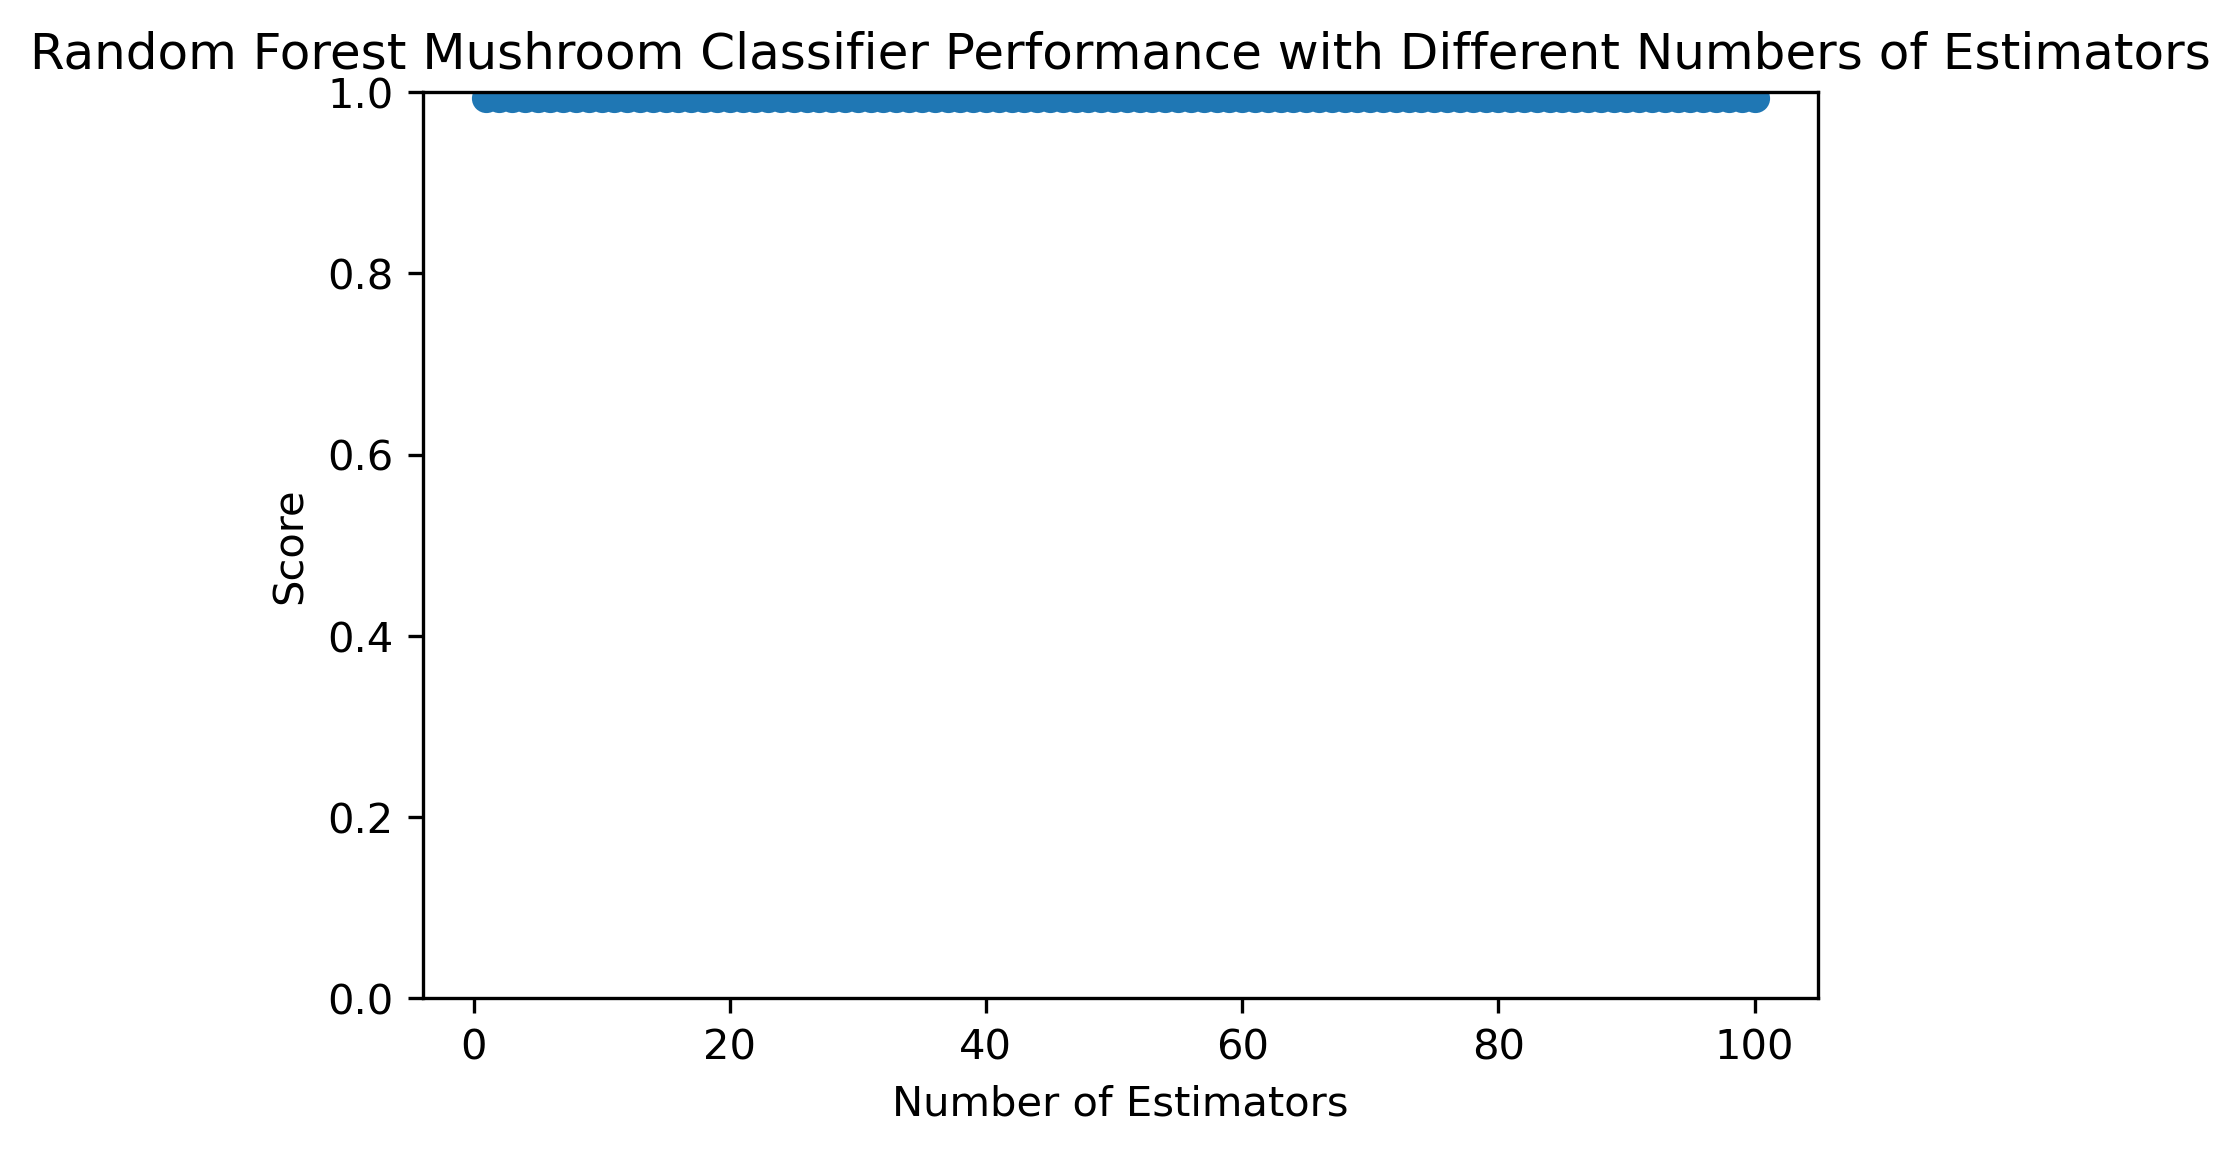

In [41]:
# Visualize the Random Forest model performance with respect to changing n_estimator values
fig, ax = plt.subplots()
scatter = ax.scatter(range(1, 101), rf_scores_df['score'])

ax.set_title('Random Forest Mushroom Classifier Performance with Different Numbers of Estimators')
ax.set_ylabel('Score')
ax.set_ylim((0, 1))
ax.set_xlabel('Number of Estimators')

plt.show()